In [63]:
import pandas as pd
import time
import random
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=16

In [16]:
dataframes = {}
for filename in os.listdir("./wukongdc_seq_tests/"):
    if filename.endswith(".csv"):
        print("Reading in file '%s'" % filename)
        full_filepath = os.path.join("./wukongdc_seq_tests/", filename)
        df = pd.read_csv(full_filepath)
        key = filename[filename.index('=')+1:-1].split('_')[0]
        print("key: " + str(key))
        dataframes[key] = df

Reading in file 'mergesort_8192_seq=128_bench.csv'
key: 128
Reading in file 'mergesort_8196_seq=1024_bench.csv'
key: 1024
Reading in file 'mergesort_8196_seq=16_bench.csv'
key: 16
Reading in file 'mergesort_8196_seq=256_bench.csv'
key: 256
Reading in file 'mergesort_8196_seq=2_bench.csv'
key: 2
Reading in file 'mergesort_8196_seq=32_bench.csv'
key: 32
Reading in file 'mergesort_8196_seq=4_bench.csv'
key: 4
Reading in file 'mergesort_8196_seq=512_bench.csv'
key: 512
Reading in file 'mergesort_8196_seq=64_bench.csv'
key: 64
Reading in file 'mergesort_8196_seq=8_bench.csv'
key: 8


Sequential Threshold:	2	Average Runtime: 12.169300
Sequential Threshold:	4	Average Runtime: 12.634008
Sequential Threshold:	8	Average Runtime: 11.693829
Sequential Threshold:	16	Average Runtime: 11.842830
Sequential Threshold:	32	Average Runtime: 10.803007
Sequential Threshold:	64	Average Runtime: 10.042816
Sequential Threshold:	128	Average Runtime: 9.040042
Sequential Threshold:	256	Average Runtime: 8.603364
Sequential Threshold:	512	Average Runtime: 8.379465
Sequential Threshold:	1024	Average Runtime: 7.929874
2	12.169300
4	12.634008
8	11.693829
16	11.842830
32	10.803007
64	10.042816
128	9.040042
256	8.603364
512	8.379465
1024	7.929874


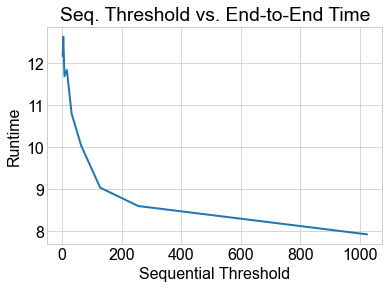

In [71]:
times = []
for seq_thresh, df in dataframes.items():
    t = df.mean(axis = 0)['time']
    times.append((int(seq_thresh), float(t)))
    
for seq_thresh, t in sorted(times, key = lambda x: x [0]):
    print("Sequential Threshold:\t%d\tAverage Runtime: %f" % (int(seq_thresh), t))

for seq_thresh, t in sorted(times, key = lambda x: x [0]):
    print("%d\t%f" % (int(seq_thresh), t))

xs,ys = [], [] 

for seq_thresh, t in sorted(times, key = lambda x: x [0]):
    xs.append(seq_thresh)
    ys.append(t)    

plt.title("Seq. Threshold vs. End-to-End Time")
plt.xlabel("Sequential Threshold")
plt.ylabel("Runtime")
plt.plot(xs, ys)

Sequential Threshold:	2	Cost: 7.132471635103226e-08
Sequential Threshold:	4	Cost: 6.791688192844392e-08
Sequential Threshold:	8	Cost: 3.514257351016999e-08
Sequential Threshold:	16	Cost: 1.878144564604759e-08
Sequential Threshold:	32	Cost: 9.627344546318056e-09
Sequential Threshold:	64	Cost: 5.9035856966972355e-09
Sequential Threshold:	128	Cost: 3.3168091516494755e-09
Sequential Threshold:	256	Cost: 2.151283852338791e-09
Sequential Threshold:	512	Cost: 1.496305987596512e-09
Sequential Threshold:	1024	Cost: 1.2064715235233306e-09
2	0.000000
4	0.000000
8	0.000000
16	0.000000
32	0.000000
64	0.000000
128	0.000000
256	0.000000
512	0.000000
1024	0.000000


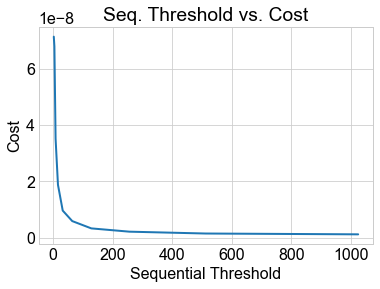

In [77]:
costs = []
for seq_thresh, df in dataframes.items():
    t = df.mean(axis = 0)['cost']
    costs.append((int(seq_thresh), float(t)))
    
for seq_thresh, t in sorted(costs, key = lambda x: x [0]):
    print("Sequential Threshold:\t" + str(seq_thresh) + "\tCost: " + str(t))

for seq_thresh, t in sorted(costs, key = lambda x: x [0]):
    print("%d\t%f" % (int(seq_thresh), t))
    
xs,ys = [], [] 

for seq_thresh, t in sorted(costs, key = lambda x: x [0]):
    xs.append(seq_thresh)
    ys.append(t)    

plt.title("Seq. Threshold vs. Cost")
plt.xlabel("Sequential Threshold")
plt.ylabel("Cost")
plt.plot(xs, ys)    

Sequential Threshold:	2	Aggregate Duration/Runtime: 1018.924519
Sequential Threshold:	4	Aggregate Duration/Runtime: 970.241170
Sequential Threshold:	8	Aggregate Duration/Runtime: 502.036764
Sequential Threshold:	16	Aggregate Duration/Runtime: 268.306366
Sequential Threshold:	32	Aggregate Duration/Runtime: 137.533494
Sequential Threshold:	64	Aggregate Duration/Runtime: 84.336939
Sequential Threshold:	128	Aggregate Duration/Runtime: 47.382988
Sequential Threshold:	256	Aggregate Duration/Runtime: 30.732626
Sequential Threshold:	512	Aggregate Duration/Runtime: 21.375800
Sequential Threshold:	1024	Aggregate Duration/Runtime: 17.235307
2	1018.924519
4	970.241170
8	502.036764
16	268.306366
32	137.533494
64	84.336939
128	47.382988
256	30.732626
512	21.375800
1024	17.235307


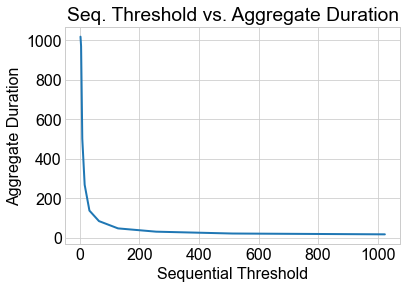

In [73]:
agg_dur = []
for seq_thresh, df in dataframes.items():
    t = df.mean(axis = 0)['aggregate_duration']
    agg_dur.append((int(seq_thresh), t))
    
for seq_thresh, t in sorted(agg_dur, key = lambda x: x [0]):
    print("Sequential Threshold:\t%d\tAggregate Duration/Runtime: %f" % (int(seq_thresh), t))

for seq_thresh, t in sorted(agg_dur, key = lambda x: x [0]):
    print("%d\t%f" % (int(seq_thresh), t))
        
xs,ys = [], [] 

for seq_thresh, t in sorted(agg_dur, key = lambda x: x [0]):
    xs.append(seq_thresh)
    ys.append(t)    

plt.title("Seq. Threshold vs. Aggregate Duration")
plt.xlabel("Sequential Threshold")
plt.ylabel("Aggregate Duration")
plt.plot(xs, ys)    